# Machine Learning - Aprendizaje No Supervisado

Implementación y visualización de k-means en 2D

In [1]:
# Cargo data en un dataframe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
data_original = pd.read_csv('kmeans1.csv')

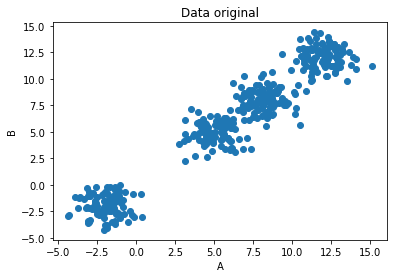

In [2]:
# Hago un gráfico de dispersión, y nos daremos cuenta de que se visualizan 4 cluster aproximadamente. 
plt.scatter(data_original.iloc[:,0],data_original.iloc[:,1])
plt.title("Data original")
plt.xlabel("A")
plt.ylabel("B")
plt.show()

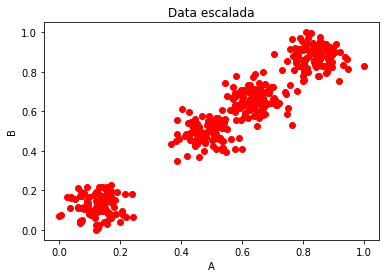

In [3]:
# Ahora escalo la data_orignal en el rango [0,1] con MinMaxScaler y hago el gráfico de dispersión con la data ya escalada
scaler = MinMaxScaler()
data = scaler.fit_transform(data_original)
data = pd.DataFrame(data, columns=['A', 'B'])
plt.scatter(data.iloc[:,0],data.iloc[:,1],color='r')
plt.title("Data escalada")
plt.xlabel("A")
plt.ylabel("B")
plt.show()

D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


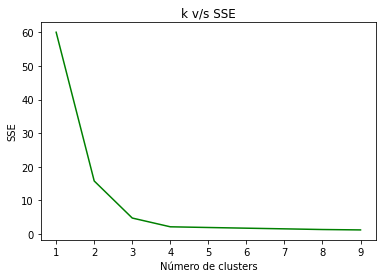

In [4]:
# Implemento k-means, para lo cual busco un "buen" k, el cual obtengo entrenando con varios k distintos y graficando versus los
# "errores", donde "errores" son la suma de las distancias al cuadrado desde cada punto al centroide del cluster más cercano
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=5000).fit(data)
    sse[k] = kmeans.inertia_  
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()),color='g')
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.title("k v/s SSE")
plt.show()

In [5]:
# Elijo un k=4, ya que utilizando el método del codo buscamos el valor k que satisfaga que un incremento de k no mejore 
# sustancialmente la distancia media intra-cluster, y gráfcamente se aprecia que al pasar de 4 a 5 no mejora sustancialmente.
k_means = KMeans(n_clusters=4)
k_means.fit(data)

KMeans(n_clusters=4)

In [6]:
# Obtengo los centroides
k_means.cluster_centers_

array([[0.12488096, 0.1225848 ],
       [0.64504777, 0.66137917],
       [0.83902637, 0.87789952],
       [0.48395258, 0.49330798]])

In [7]:
# Obtengo los clusters asignados a cada dato del dataframe
k_means.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2,

In [8]:
# Obtengo la distancia media intra-cluster
k_means.inertia_

2.1761149778977487

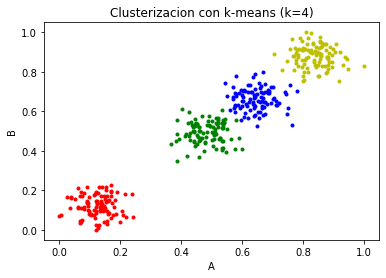

In [9]:
# Ahora quiero graficar la clusterizacion, para lo cual añado una nueva variable llamada "clase" que contiene las etiquetas, y
# hago un gráfico de dispersión con un bucle que recorra las 4 segmentaciones realizadas
data['clase'] = k_means.labels_
colores = ['r.', 'b.', 'y.', 'g.']
for i in range(0,4):
    plt.plot(data['A'][data['clase']==i],data['B'][data['clase']==i],colores[i])
plt.ylabel('B')
plt.xlabel('A')
plt.title("Clusterizacion con k-means (k=4)")
plt.show()

Análisis de clusters

In [10]:
# Cargo la data en un dataframe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
data_original = pd.read_csv('kmeans2.csv',index_col=0)

In [11]:
# Veo los 5 primeros datos
data_original.head()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0.02700,0.000000,3,0.270000,0.019,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,0.21400,0.000000,18,0.346667,0.126,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,0.27050,0.000000,1,0.223333,0.232,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,0.34250,0.000000,13,0.396667,-0.017,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,0.01075,0.097155,1,0.313830,-0.002,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264


In [12]:
# Veo los tipos de datos de cada columna. Notamos que son todas numéricas.
data_original.dtypes

Amplitude           float64
AndersonDarling     float64
Autocor_length        int64
Beyond1Std          float64
Gskew               float64
LinearTrend         float64
MaxSlope            float64
Mean                float64
Meanvariance        float64
MedianAbsDev        float64
MedianBRP           float64
PercentAmplitude    float64
PeriodLS            float64
dtype: object

In [13]:
#Creo un bucle que recorra toda las columnas y diga cuantos NULL hay en cada una. Notamos que no hay NULL.
for i in data_original.columns: 
    print(i+': '+ str(data_original[i].isnull().sum()))

Amplitude: 0
AndersonDarling: 0
Autocor_length: 0
Beyond1Std: 0
Gskew: 0
LinearTrend: 0
MaxSlope: 0
Mean: 0
Meanvariance: 0
MedianAbsDev: 0
MedianBRP: 0
PercentAmplitude: 0
PeriodLS: 0


In [14]:
# Obtengo los estadisticos descriptivos de la data cargada para conocerla mejor. Notamos que algunas caracteristicas que están
# en escalas muy distintas a otras, por ej: media de LinearTrend es 0.000001 y la de PeriodLS 302.831851, por lo que tendremos
# más adelate que escalar las variables para que sean comparables
data_original.describe()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.106905,0.130491,4.545400,0.317532,0.016345,0.000001,2.175457,14.988370,0.003703,0.039180,0.414658,0.010616,302.831851
std,0.147896,0.202838,6.121163,0.060427,0.126287,0.000684,9.423721,1.889971,0.005527,0.062624,0.122715,0.014490,944.665723
min,0.007000,0.000000,1.000000,0.070470,-1.763000,-0.016436,0.006402,11.666225,0.000259,0.002000,0.069444,0.000893,0.005627
25%,0.021000,0.000016,1.000000,0.290000,-0.004000,-0.000015,0.096856,13.608853,0.000743,0.007000,0.336667,0.002375,0.987460
50%,0.043500,0.020842,2.000000,0.318182,0.002500,-0.000002,0.342336,14.514339,0.001596,0.014000,0.411089,0.004850,18.144685
75%,0.143500,0.185764,5.000000,0.348214,0.017000,0.000009,1.038683,15.592764,0.005258,0.051500,0.480000,0.014186,189.760635
max,1.700500,0.980413,70.000000,0.536667,1.479000,0.033689,335.151515,21.099524,0.075959,1.025000,0.922034,0.171519,12870.875640


In [15]:
# Analizo las columnas que posean posibles outliers, donde sus extremos se alejen mucho de su media, y unos posibles
# candidatos serían las columnas Autocor_length, Gskew, LinearTrend, MaxSlope y PeriodLS

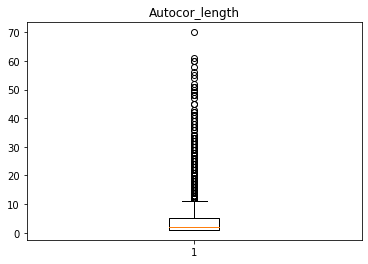

In [16]:
# Hago un grafico de cajas de Autocor_length y nos damos cuenta que no tiene realmente grandes outliers
plt.boxplot(data_original['Autocor_length'])
plt.title("Autocor_length")
plt.show()

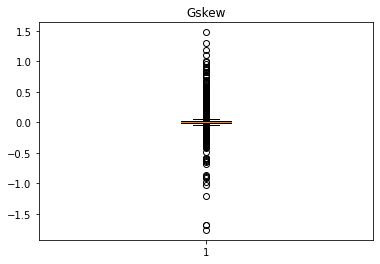

In [17]:
# Hago un grafico de cajas de Gskew y nos damos cuenta que no tiene realmente grandes outliers
plt.boxplot(data_original['Gskew'])
plt.title("Gskew")
plt.show()

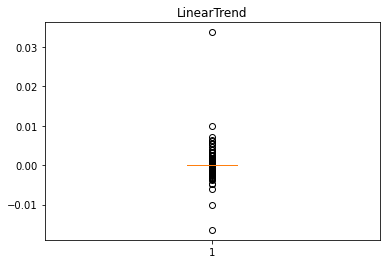

In [18]:
# Hago un grafico de cajas de LinearTrend y nos damos cuenta que tiene 1 outlier grande, el cual eliminaremos del dataframe
# para que no ensucie posibles modelos creados que buscan generalizar su rendimiento y no influenciarse por outliers
plt.boxplot(data_original['LinearTrend'])
plt.title("LinearTrend")
plt.show()

In [19]:
# Entonces para eliminar solo la fila de ese outlier, elimino la fila donde la columna LinearTrend sea maxima
id_borrar=data_original['LinearTrend'].idxmax()
data_nueva=data_original.drop([id_borrar],axis=0)

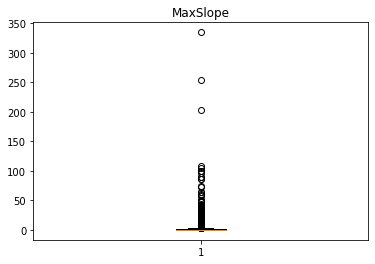

In [20]:
# Hago un grafico de cajas de MaxSlope y nos damos cuenta que tiene 3 grandes outliers, los cuales sacaremos del dataframe
plt.boxplot(data_nueva['MaxSlope'])
plt.title("MaxSlope")
plt.show()

In [21]:
# Entonces para eliminar solo las 3 filas donde MaxSlope se maximo, busco los id de los maximos y los saco del dataframe:
id_borrar=data_nueva['MaxSlope'].idxmax()
data_nueva2=data_nueva.drop([id_borrar],axis=0)
id_borrar=data_nueva2['MaxSlope'].idxmax()
data_nueva3=data_nueva2.drop([id_borrar],axis=0)
id_borrar=data_nueva3['MaxSlope'].idxmax()
data_nueva4=data_nueva3.drop([id_borrar],axis=0)

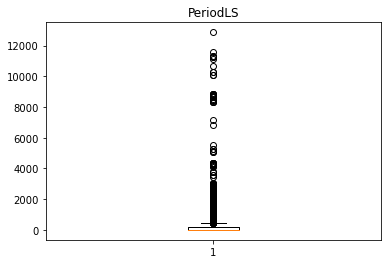

In [22]:
# Hago un grafico de cajas de PeriodLS y nos damos cuenta que no tiene realmente grandes outliers
plt.boxplot(data_nueva4['PeriodLS'])
plt.title("PeriodLS")
plt.show()

In [23]:
# Ahora escalo la data_orignal (ya sin outliers muy grandes) en el rango [0,1] con MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data_nueva4)
columnas = data_nueva4.columns.values
data = pd.DataFrame(data, columns=[columnas])

In [24]:
# Vemos la forma que tienen nuestros datos: 13 caracteristicas. Haremos una reducción de dimensionalidad para procesar
# con los siguientes modelos solo los componentes principales.
data.shape

(4996, 13)

In [25]:
# Para determinar cuantos componentes usaremos, graficaremos el Porcentaje de varianza explicada acumulada para cada 
# caracteristica (las 13 actuales). Y para eso hay que calclar una serie de valores: los autovalores y autovectores
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
# Calculamos los autovalores y autovectores de la matriz:
cov_mat = np.cov(data.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# Ordenamos estas parejas de orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)
# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
0.05511271127085115
0.03934007456995291
0.03263983462474491
0.015609195496906675
0.0065949647415382215
0.004991911256079385
0.003420679808964875
0.003073198155803134
0.0011424121042199298
0.0004280224395629893
0.00033976762823630856
0.00010038226809770453
3.994582918281934e-05


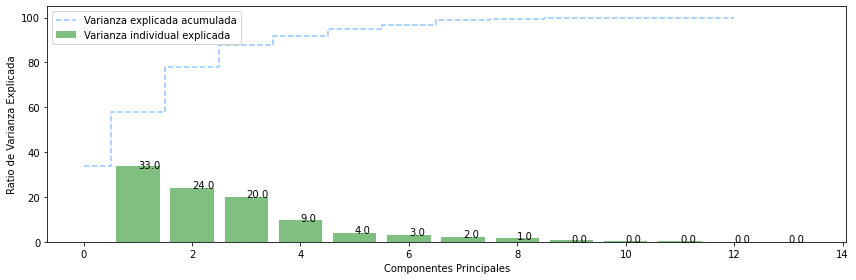

In [26]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
lista = list(range(1,13+1))
# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i,y_list[i-1],y_list[i-1])
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(12, 4))
    plt.bar(lista, var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(13), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    add_value_label(lista,np.trunc(var_exp))
    plt.tight_layout()

In [27]:
# Al analizar el gráfico notamos que las 3 primeras variables explican cerca del 80% de la varianza, por lo que tomamos la
# decisionn de construir una matriz de proyección que convertirá el conjunto de datos inicial (de 13D) en un 
# conjunto de datos de 3D centrado en sus componentes principales.
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # n dimensiones que queremos reducir nuestros datos
pca.fit(data)
x_pca_gmm=pca.transform(data)
x_pca_gmm.shape
x_pca_gmm

D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
D:\Anaconda\Archivos_de_instalacion\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([[-0.03388704, -0.03769873, -0.23463901],
       [-0.01632224,  0.32102847,  0.01642004],
       [-0.47702217, -0.28516295,  0.05052348],
       ...,
       [ 0.02170886,  0.1492969 , -0.03458685],
       [ 0.33181664, -0.13456157,  0.06008505],
       [ 0.07092618,  0.19331751, -0.06386642]])

C:\Users\crist\AppData\Local\Temp\ipykernel_19904\3473372803.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


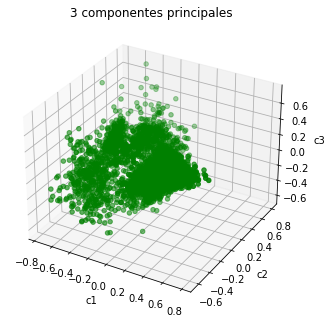

<Figure size 1728x1152 with 0 Axes>

In [28]:
# Y graficamos nuestros 3 componentes principales que usaremos:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
x_pca_gmm=pd.DataFrame(x_pca_gmm,columns=['c1','c2','c3'])
x = x_pca_gmm['c1']
y = x_pca_gmm['c2']
z = x_pca_gmm['c3']
# Creamos la figura
fig = plt.figure()
ax = Axes3D(fig)
plot_geeks = ax.scatter(x, y, z, c='g', marker='o')
ax.set_title("3 componentes principales")
ax.set_xlabel('c1')
ax.set_ylabel('c2')
ax.set_zlabel('c3')
plt.figure(figsize=(24, 16))
plt.show()

In [29]:
# Vemos los 3 componentes principales
data=x_pca_gmm
data

,c1,c2,c3
0,-0.033887,-0.037699,-0.234639
1,-0.016322,0.321028,0.016420
2,-0.477022,-0.285163,0.050523
3,-0.078376,0.349902,0.120921
4,0.097291,0.000232,-0.161392
...,...,...,...
4991,0.128518,0.083916,-0.093513
4992,-0.022738,0.467030,0.074777
4993,0.021709,0.149297,-0.034587
4994,0.331817,-0.134562,0.060085


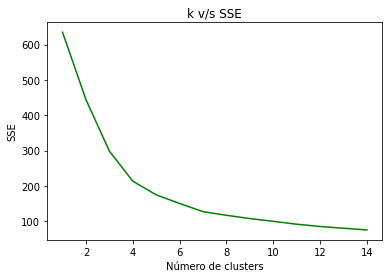

In [30]:
# Implemento k-means, para lo cual busco un "buen" k, y para eso grafico los distintos k vs el SSE
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=10000).fit(data)
    sse[k] = kmeans.inertia_  
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()),color='g')
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.title("k v/s SSE")
plt.show()

In [31]:
# En el gráfico notamos que en k=7 hay una disminución de la pendiente y establizacion de la disminución. Elijo k=7.
k_means = KMeans(n_clusters=7)
k_means.fit(data)
# Obtengo los centroides
k_means.cluster_centers_

array([[ 0.04213556,  0.18339115, -0.06016553],
       [-0.40967251, -0.34986402, -0.10905654],
       [-0.36296775, -0.04832134,  0.26271723],
       [ 0.1940856 , -0.0715641 ,  0.03696136],
       [-0.01133605, -0.0163912 , -0.16371855],
       [-0.15636237,  0.30121097,  0.22508196],
       [ 0.41233634, -0.25035296,  0.24240925]])

In [32]:
# Como resultado se obtuvieorn los centroides de los 7 clusters generados, y como existe en la data 3 componentes principales, 
# para cada cluster hay un vector de 3 valores que equivalen al centroide optimo según el k=7 escogido. 
# El centroide se puede considerar como la representación de la "observación promedio" 
# dentro de un conglomerado para todas las variables incluidas en el análisis.

In [33]:
# Ahora utlizando el indicador davies_bouldin_score obtengo el rendimiento K-means
from sklearn.metrics import davies_bouldin_score
k_means = KMeans(n_clusters=6)
k_means.fit(data)
labels = k_means.predict(data)
index = davies_bouldin_score(data, labels)
'Davies Bouldin score para K-MEANS ='+ str(index)

'Davies Bouldin score para K-MEANS =0.8911832624548194'

In [34]:
# Ahora aplico Clustering Jerarquico
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import norm, multivariate_normal
from sklearn.cluster import AgglomerativeClustering as AC
from scipy.cluster.hierarchy import dendrogram
# Agrupo la data (cada campo) verticalmente
data=x_pca_gmm
data_nueva = data
data = data_nueva.to_numpy()
# Usaremos un estraxto de 30 datos por columna para que se logre visualizar bien un Dendograma
n=30
c1=np.random.choice(data[:,0], size=n)
c2=np.random.choice(data[:,1], size=n)
c3=np.random.choice(data[:,2], size=n)
data_arreglo = np.concatenate((c1, c2,c3)).reshape(-1,1)

In [35]:
# Creo una etiqueta para cada variable
etiqueta = np.hstack([0*np.ones(np.shape(c1)),1*np.ones(np.shape(c2)),2*np.ones(np.shape(c3))]).reshape(-1,1)

In [36]:
# Defino los hiperparametros del modelo y lo entreno
ac = AC(n_clusters=None,
        affinity='euclidean',
        linkage = 'complete',
        distance_threshold=0.0)
ac.fit(data_arreglo)

AgglomerativeClustering(distance_threshold=0.0, linkage='complete',
                        n_clusters=None)

In [37]:
# Para graficar el Dendograma, usaré una función:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

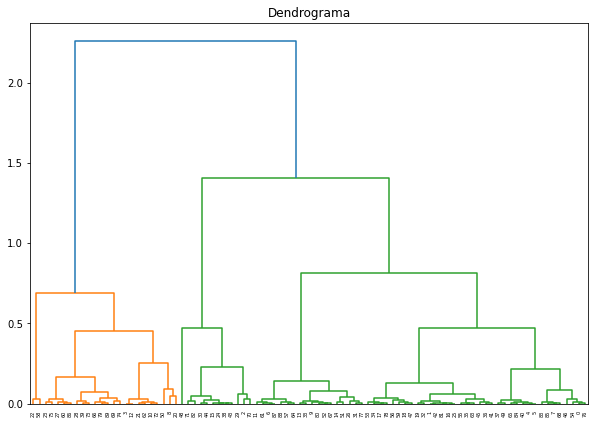

In [39]:
# Ahora grafico el Dendograma, y la gráfica mostrará n clusters generados (n colores) con método de Clustering Jerarquico
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograma")
dendrograma = shc.dendrogram(shc.linkage(data_arreglo, method = 'ward'))

In [40]:
# Ahora estudiaremos el método de las Mezclas Gaussianas (GMM)
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.decomposition import PCA
import scipy.stats
from sklearn.mixture import GaussianMixture as GMM
from scipy.stats import multivariate_normal as mvn
# Este modelo es un modelo probabilístico que asume que todos los datos son generados desde un número finito de
# distribuciones gaussianas (DG) con parámetros desconocidos, una especie de "versión probabilística de K-means".
# El desafío es saber cuantas DG escoger como hiperparametro, para lo cual usaremos los indiadores:
# AIC (Akaike’s Information Criteria) y BIC (Bayesian Information Criteria).
gaussianas = np.arange(1,30)
modelos = [GMM(n, covariance_type = 'full', random_state = 0,init_params='kmeans').fit(data)
           for n in gaussianas]

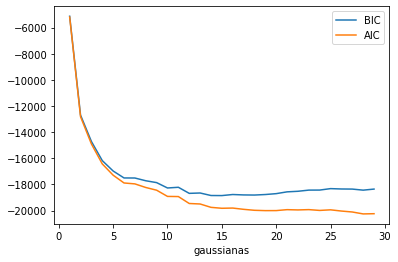

In [41]:
# Grafico el AIC y el BIC
plt.plot(gaussianas, [m.bic(data) for m in modelos], label = 'BIC')
plt.plot(gaussianas, [m.aic(data) for m in modelos], label = 'AIC')
plt.legend(loc='best')
plt.xlabel('gaussianas')
plt.show()

In [42]:
# En la gráfica notamos que cerca de 20 el AIC y el BIC empiezan a aumentar, por lo que detallaremos entre esos valores:
gaussianas = np.arange(17,23)
modelos = [GMM(n, covariance_type = 'full', random_state = 0).fit(data)
           for n in gaussianas]

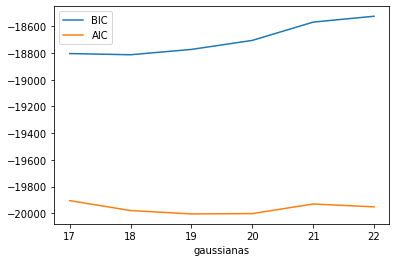

In [43]:
# Grafico el AIC y el BIC entre 17 y 22
plt.plot(gaussianas, [m.bic(data) for m in modelos], label = 'BIC')
plt.plot(gaussianas, [m.aic(data) for m in modelos], label = 'AIC')
plt.legend(loc='best')
plt.xlabel('gaussianas')
plt.show()

In [44]:
# Como la gráfica nos dice que entre 17 y 22 puede estar el optimo de gaussianas, en este rango usaremos el indicador  
# davies_bouldin_score, para elegir el el optimo de gaussianas, el cual serán de 17.
from sklearn.metrics import davies_bouldin_score
for k in range(17,23):
    gmm = GaussianMixture(n_components =k, covariance_type = 'full',random_state = 0).fit(data)
    labels = gmm.predict(data)
    print(str(k)+' componentes')
    index = davies_bouldin_score(data, labels)
    print('Davies Bouldin score='+ str(index))  

17 componentes
Davies Bouldin score=1.3257073171414089
18 componentes
Davies Bouldin score=1.416976278772081
19 componentes
Davies Bouldin score=1.415547818493697
20 componentes
Davies Bouldin score=1.421978891467899
21 componentes
Davies Bouldin score=1.3854642110337996
22 componentes
Davies Bouldin score=1.3831708339831494


In [45]:
# Modelo GMM con gaussianas=17 y su indicador davies_bouldin_score
gmm = GaussianMixture(n_components =17, covariance_type = 'full',random_state = 0).fit(data)
labels = gmm.predict(data)
index = davies_bouldin_score(data, labels)
'Davies Bouldin score para GMM ='+ str(index)

'Davies Bouldin score para GMM =1.3257073171414089'

In [46]:
# Ahora utlizando el indicador davies_bouldin_score comparare contra K-means
from sklearn.metrics import davies_bouldin_score
k_means = KMeans(n_clusters=6)
k_means.fit(data)
labels = k_means.predict(data)
index = davies_bouldin_score(data, labels)
'Davies Bouldin score para K-MEANS ='+ str(index)

'Davies Bouldin score para K-MEANS =0.8922013527357245'

In [ ]:
# Comparando los resultados, a la luz de la data, el modelo de K-means arrojó mejor indicador de Davies Bouldin que GMM.